In [6]:
import numpy as np
with open("data/story.txt", "r", encoding="utf-8") as f:
    story = f.read()

In [7]:
story

'Emma Reed\'s Monday morning lasted exactly nine minutes before it imploded.\nAt 9:09 a.m., halfway through her first virtual presentation at her new job, a thunderous clang shattered through her ceiling — followed by a metallic crash and a very human, "Oh crap!"\nHer laptop screen froze. Coffee splattered across her spreadsheet. The ceiling above her dining table now had a neat, circular dent — as if God Himself had decided to play drums.\nEmma blinked once, twice, then said very calmly, "I\'ll be right back," into the stunned silence of the Zoom call.\nBy 9:10, she was stomping up the old wooden stairs to Apartment 3B — still barefoot, coffee dripping down her wrist, righteous fury building with every step. She didn\'t know who lived up there, but whoever they were had just declared war.\nThe door opened to reveal a tall, unshaven man in a faded band tee, holding a cracked cymbal like a wounded animal. Behind him, cables, amps, and empty coffee cups spilled across the room like moder

In [8]:
def strip_newlines(data):
    """Remove all newline characters from text."""
    return data.replace('\n', ' ')


def make_splits(data, n_lines=2):
    """Split text into chunks of n_lines sentences."""
    result = []
    sentences = data.split('.')
    for i in range(0, len(sentences), n_lines):
        chunk = '.'.join(sentences[i:i+n_lines])
        if chunk:  # Only add non-empty chunks
            result.append(chunk + '.')
    return result

In [9]:
story = strip_newlines(story)
story_split = make_splits(story, n_lines=8)


In [14]:
for l in story_split:
    print(len(l))
    # print(l)
    # print('-'*100)


711
539
513
388
229
397
797
640
363
453
492
559
475
549
404
272
425
553
110


In [5]:
from datasets import load_dataset

ds = load_dataset("IsmaelMousa/books")

In [6]:
data = ds['train']['EN'][0][27:]

In [7]:
story = """Emma Reed’s Monday morning lasted exactly nine minutes before it imploded.
At 9:09 a.m., halfway through her first virtual presentation at her new job, a thunderous clang shattered through her ceiling — followed by a metallic crash and a very human, “Oh crap!”
Her laptop screen froze. Coffee splattered across her spreadsheet. The ceiling above her dining table now had a neat, circular dent — as if God Himself had decided to play drums.
Emma blinked once, twice, then said very calmly, “I’ll be right back,” into the stunned silence of the Zoom call.
By 9:10, she was stomping up the old wooden stairs to Apartment 3B — still barefoot, coffee dripping down her wrist, righteous fury building with every step. She didn’t know who lived up there, but whoever they were had just declared war.
The door opened to reveal a tall, unshaven man in a faded band tee, holding a cracked cymbal like a wounded animal. Behind him, cables, amps, and empty coffee cups spilled across the room like modern art.
“Uh… hi,” he said. “Funny story—”
“Not really,” Emma snapped. “You nearly gave my boss a heart attack. What are you even doing up here?”
He grinned — the kind of grin that suggested this wasn’t his first apology of the week.
“Technically? Sound design. Emotionally? Regretting it.”
Emma stared at him. Portland, she realized, had lied to her. The apartment ad had said ‘quiet building.’"""

In [8]:
data = story
data

'Emma Reed’s Monday morning lasted exactly nine minutes before it imploded.\nAt 9:09 a.m., halfway through her first virtual presentation at her new job, a thunderous clang shattered through her ceiling — followed by a metallic crash and a very human, “Oh crap!”\nHer laptop screen froze. Coffee splattered across her spreadsheet. The ceiling above her dining table now had a neat, circular dent — as if God Himself had decided to play drums.\nEmma blinked once, twice, then said very calmly, “I’ll be right back,” into the stunned silence of the Zoom call.\nBy 9:10, she was stomping up the old wooden stairs to Apartment 3B — still barefoot, coffee dripping down her wrist, righteous fury building with every step. She didn’t know who lived up there, but whoever they were had just declared war.\nThe door opened to reveal a tall, unshaven man in a faded band tee, holding a cracked cymbal like a wounded animal. Behind him, cables, amps, and empty coffee cups spilled across the room like modern a

In [3]:
def strip_newlines(data):
    return data.replace('\n', ' ')

def make_splits(data, n_lines = 2):
    result = []
    sentences = data.split('.')
    for i in range(0, len(sentences), n_lines):
        chunk = '.'.join(sentences[i:i+n_lines])
        if chunk:  # Only add non-empty chunks
            result.append(chunk + '.')
    return result

def add_newlines(text, k = 40):
    result = []
    current_line = ""

    words = text.split()

    # print(text)
    
    for word in words:
        # Check if adding this word would exceed k characters
        if len(current_line) + len(word) + (1 if current_line else 0) >= k:
            # Add current line to result and start new line
            if current_line:
                result.append(current_line)
                current_line = word
            else:
                # Word itself is longer than k, add it anyway
                result.append(word)
        else:
            # Add word to current line
            if current_line:
                current_line += " " + word
            else:
                current_line = word
        
    # Add the last line if it exists
    if current_line:
        result.append(current_line)

    indv_lines = [line + '\n' for line in result[:-1]] + [result[-1]]

    
    return '\n'.join(result), indv_lines

In [12]:
data = strip_newlines(data)
data_split = make_splits(data, n_lines=4)
for line in data_split:
    text, indv_lines = add_newlines(line, k=80)
    print(line)
    print(repr(text))
    print(indv_lines)
    print('-'*100)

    break

Emma Reed’s Monday morning lasted exactly nine minutes before it imploded. At 9:09 a.m., halfway through her first virtual presentation at her new job, a thunderous clang shattered through her ceiling — followed by a metallic crash and a very human, “Oh crap!” Her laptop screen froze.
'Emma Reed’s Monday morning lasted exactly nine minutes before it imploded. At\n9:09 a.m., halfway through her first virtual presentation at her new job, a\nthunderous clang shattered through her ceiling — followed by a metallic crash\nand a very human, “Oh crap!” Her laptop screen froze.'
['Emma Reed’s Monday morning lasted exactly nine minutes before it imploded. At\n', '9:09 a.m., halfway through her first virtual presentation at her new job, a\n', 'thunderous clang shattered through her ceiling — followed by a metallic crash\n', 'and a very human, “Oh crap!” Her laptop screen froze.']
----------------------------------------------------------------------------------------------------


In [13]:
print(text)

Emma Reed’s Monday morning lasted exactly nine minutes before it imploded. At
9:09 a.m., halfway through her first virtual presentation at her new job, a
thunderous clang shattered through her ceiling — followed by a metallic crash
and a very human, “Oh crap!” Her laptop screen froze.


In [14]:
import dotenv
import os
from transformers import AutoTokenizer, AutoModelForCausalLM

In [15]:
def load_model_and_tokenizer(model_name):
    """Load tokenizer and model"""
    print(f"Loading model: {model_name}")
    path = '/home/kartik/all_keys/.env'
    dotenv.load_dotenv(path)
    hf_token = os.getenv("HF_TOKEN")
    cache = "/mnt/SSD4/kartik/hf_cache"

    HF_TOKEN = os.getenv('HF_TOKEN')

    # Set HuggingFace cache directory globally
    os.environ['HF_HOME'] = cache
    os.environ['HUGGINGFACE_HUB_CACHE'] = cache
    os.environ['TRANSFORMERS_CACHE'] = cache
    os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
    
    tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=cache)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        trust_remote_code=True,
        device_map="auto",
        cache_dir=cache,
    )
    model.eval()
    print("Model loaded successfully!")
    return model, tokenizer

In [16]:
model, tokenizer = load_model_and_tokenizer('meta-llama/Llama-3.1-8B-Instruct')

Loading model: meta-llama/Llama-3.1-8B-Instruct


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Model loaded successfully!


In [48]:
import torch

def generate_chat_completion(
    model,
    tokenizer,
    messages,
    max_new_tokens: int = 500,
    temperature: float = 0.7,
    top_p: float = 0.9,
    greedy = False
) -> str:

    # === 1) Format messages into a prompt using the tokenizer's chat template ===
    formatted_prompt = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=False,
    )
    print(formatted_prompt)
    # === 2) Tokenize ===
    inputs = tokenizer(formatted_prompt, return_tensors="pt").to(model.device)

    # === 3) Generate ===
    if not greedy:
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=max_new_tokens,
                do_sample=True,
                temperature=temperature,
                top_p=top_p,
                pad_token_id=tokenizer.eos_token_id,
                eos_token_id=tokenizer.eos_token_id,
            )
    else:
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=max_new_tokens,
                pad_token_id=tokenizer.eos_token_id,
                eos_token_id=tokenizer.eos_token_id,
            )
    # === 4) Extract only the newly generated tokens ===
    input_len = inputs["input_ids"].shape[1]
    new_tokens = outputs[0][input_len:]
    completion = tokenizer.decode(new_tokens, skip_special_tokens=True).strip()

    return completion


def create_chat_completion_prompt(tokenizer, user_question: str) -> str:
    """
    Creates a traditional chat completion prompt where the user message contains 
    both the original question and the starter text to complete.
    """
    # Combine the original question with the starter text naturally
    combined_user_message = f"""{user_question}"""
    system_prompt = 'You must continue the story with the same style and tone as the user message.'
    
    # Create the conversation with only a user message
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": combined_user_message}
    ]
    
    return messages

In [53]:
data = strip_newlines(data)
data_split = make_splits(data, n_lines=8)
for line in data_split:
    text, indv_lines = add_newlines(line, k=70)
    print(line)
    print(repr(text))
    print(indv_lines)
    print('-'*100)

    break

Emma Reed’s Monday morning lasted exactly nine minutes before it imploded. At 9:09 a.m., halfway through her first virtual presentation at her new job, a thunderous clang shattered through her ceiling — followed by a metallic crash and a very human, “Oh crap!” Her laptop screen froze. Coffee splattered across her spreadsheet. The ceiling above her dining table now had a neat, circular dent — as if God Himself had decided to play drums. Emma blinked once, twice, then said very calmly, “I’ll be right back,” into the stunned silence of the Zoom call. By 9:10, she was stomping up the old wooden stairs to Apartment 3B — still barefoot, coffee dripping down her wrist, righteous fury building with every step.
'Emma Reed’s Monday morning lasted exactly nine minutes before it\nimploded. At 9:09 a.m., halfway through her first virtual\npresentation at her new job, a thunderous clang shattered through her\nceiling — followed by a metallic crash and a very human, “Oh crap!”\nHer laptop screen froz

In [54]:
print(text)

Emma Reed’s Monday morning lasted exactly nine minutes before it
imploded. At 9:09 a.m., halfway through her first virtual
presentation at her new job, a thunderous clang shattered through her
ceiling — followed by a metallic crash and a very human, “Oh crap!”
Her laptop screen froze. Coffee splattered across her spreadsheet.
The ceiling above her dining table now had a neat, circular dent — as
if God Himself had decided to play drums. Emma blinked once, twice,
then said very calmly, “I’ll be right back,” into the stunned silence
of the Zoom call. By 9:10, she was stomping up the old wooden stairs
to Apartment 3B — still barefoot, coffee dripping down her wrist,
righteous fury building with every step.


In [55]:
mess = text
mess = create_chat_completion_prompt(tokenizer, mess)
mess

[{'role': 'system',
  'content': 'You must continue the story with the same style and tone as the user message.'},
 {'role': 'user',
  'content': 'Emma Reed’s Monday morning lasted exactly nine minutes before it\nimploded. At 9:09 a.m., halfway through her first virtual\npresentation at her new job, a thunderous clang shattered through her\nceiling — followed by a metallic crash and a very human, “Oh crap!”\nHer laptop screen froze. Coffee splattered across her spreadsheet.\nThe ceiling above her dining table now had a neat, circular dent — as\nif God Himself had decided to play drums. Emma blinked once, twice,\nthen said very calmly, “I’ll be right back,” into the stunned silence\nof the Zoom call. By 9:10, she was stomping up the old wooden stairs\nto Apartment 3B — still barefoot, coffee dripping down her wrist,\nrighteous fury building with every step.'}]

In [56]:
a = generate_chat_completion(model, tokenizer, mess)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

You must continue the story with the same style and tone as the user message.<|eot_id|><|start_header_id|>user<|end_header_id|>

Emma Reed’s Monday morning lasted exactly nine minutes before it
imploded. At 9:09 a.m., halfway through her first virtual
presentation at her new job, a thunderous clang shattered through her
ceiling — followed by a metallic crash and a very human, “Oh crap!”
Her laptop screen froze. Coffee splattered across her spreadsheet.
The ceiling above her dining table now had a neat, circular dent — as
if God Himself had decided to play drums. Emma blinked once, twice,
then said very calmly, “I’ll be right back,” into the stunned silence
of the Zoom call. By 9:10, she was stomping up the old wooden stairs
to Apartment 3B — still barefoot, coffee dripping down her wrist,
righteous fury building with every step.<|eot_id|>


In [ ]:
# count chars before each \n
for line in a.split("\n"):
    print(f"{line:<70} | {len(line):>3}")

assistant                                                              |   9
                                                                       |   0
The door to Apartment 3B was slightly ajar, which was not unusual,     |  66
given the creaky hinges and the way the door sometimes got             |  58
caught. But today, it seemed more like an open invitation, a           |  60
surreptitious grin from her neighbor, the infamous Mr. Jenkins. Emma   |  68
pushed the door open and called out, "Mr. Jenkins? What the—?"         |  63
She was met with a faint scent of burnt toast and the sound of         |  62
muffled humming. Her eyes scanned the small living room, where         |  62
Mr. Jenkins was usually sprawled on the couch, surrounded by a         |  62
maze of newspaper clippings and what looked suspiciously like a        |  63
junkyard's worth of wires. But today, the room was spotless,           |  60
except for a single, smoldering cigarette butt on the coffee table.    |  67

In [57]:
# count chars before each \n
for line in a.split("\n"):
    print(f"{line:<70} | {len(line):>3}")

assistant                                                              |   9
                                                                       |   0
As she burst through the door to Apartment 3B, she was greeted by a    |  67
chaotic mess: her roommate, Jamie, frantically scrambling to           |  60
rearrange a pile of scattered tools and a torn piece of drywall,       |  64
while a bewildered-looking handyman hovered nearby, eyeing the         |  62
damage to the ceiling. Emma's gaze narrowed into a piercing stare,     |  66
and she planted her hands on her hips, her coffee-stained fingers      |  65
trembling with indignation. "What. Just. Happened?" she demanded,      |  65
her voice low and even, but laced with a hint of menace.               |  56


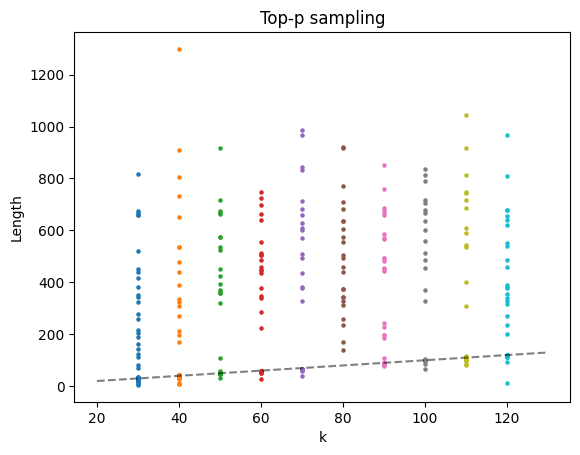

In [1]:
import json
import matplotlib.pyplot as plt
with open('outputs/statistics.json', 'r') as f:
    data = json.load(f)

for k in data.keys():
    plt.scatter([int(k)]*len(data[k]['all_lens']), data[k]['all_lens'], s=5)
    # plt.plot([int(k)-2, int(k)+2], [int(k), int(k)], 'r--')
plt.plot([20, 130], [20, 130], 'k--', alpha=0.5)
plt.xlabel('k')
plt.ylabel('Length')
plt.title('Top-p sampling')
plt.show()

In [3]:
import numpy as np
for k in data.keys():
    print("averge is ", np.mean(data[k]['all_lens']))

averge is  98.02727272727273
averge is  119.65263157894736
averge is  256.9230769230769
averge is  280.9189189189189
averge is  416.9259259259259
averge is  491.4583333333333
averge is  389.7037037037037
averge is  445.95454545454544
averge is  326.3333333333333
averge is  314.61538461538464


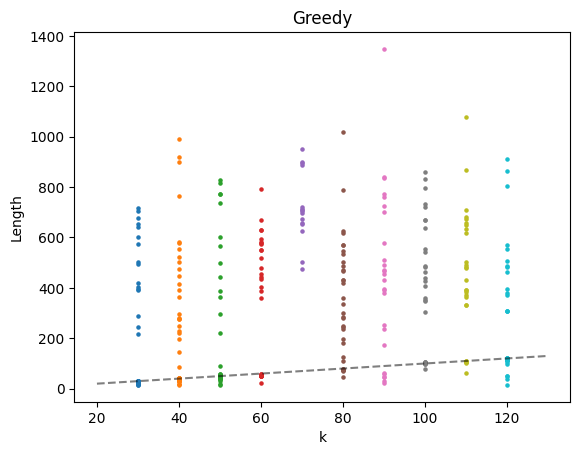

In [2]:
import json

with open('outputs_greedy/statistics.json', 'r') as f:
    data_greedy = json.load(f)

for k in data_greedy.keys():
    plt.scatter([int(k)]*len(data_greedy[k]['all_lens']), data_greedy[k]['all_lens'], s=5)
    # plt.plot([int(k)-2, int(k)+2], [int(k), int(k)], 'r--')
plt.plot([20, 130], [20, 130], 'k--', alpha=0.5)
plt.xlabel('k')
plt.ylabel('Length')
plt.title('Greedy')
plt.show()

In [4]:
import numpy as np
for k in data_greedy.keys():
    print("averge is ", np.mean(data_greedy[k]['all_lens']))

averge is  96.32710280373831
averge is  204.22413793103448
averge is  162.06896551724137
averge is  351.7931034482759
averge is  717.4666666666667
averge is  349.4117647058824
averge is  441.84615384615387
averge is  448.7307692307692
averge is  448.74074074074076
averge is  233.85416666666666
